<a href="https://colab.research.google.com/github/Yasabuana/Struktur-Data/blob/main/2420506030_StrukDat_Dijkstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx matplotlib

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, {distance, neighbor})

    return distances, previous

In [ ]:
def get_path(previous, target):
    path = []
    while target is not None :
        path.insert(0, target)
        target = previous[target]
    return path

In [ ]:
def visualize_graph(graph, path=None):
    G = nx.Digraph()

    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)
    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels = True, node_color='lightblue', node_size=2000, front_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)

    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width = 3)

    plt.title("Visualisasi Graf dan jalur terpendek")
    plt.axis('off')
    plt.show()

In [ ]:
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D' : 8, 'E': 10},
    'D': {'E' :2, 'Z': 6},
    'E': {'Z' : 3},
    'Z': {}
}

start_node = 'A'
end_node = 'Z'
distances, previous = dijkstra_with_paths(graph, start_node)

shortest_path = get_path(previous, end_node)
print(f"Jarak dari {start_node} ke {end_node} : {distances[end_node]}")
print(f"Jalur: {'->'.join(shortest_path)}")

visualize_graph(graph, path=shortest_path)

KeyError: 4

Jarak dari A ke Z : 14
Jalur: A->B->D->E->Z


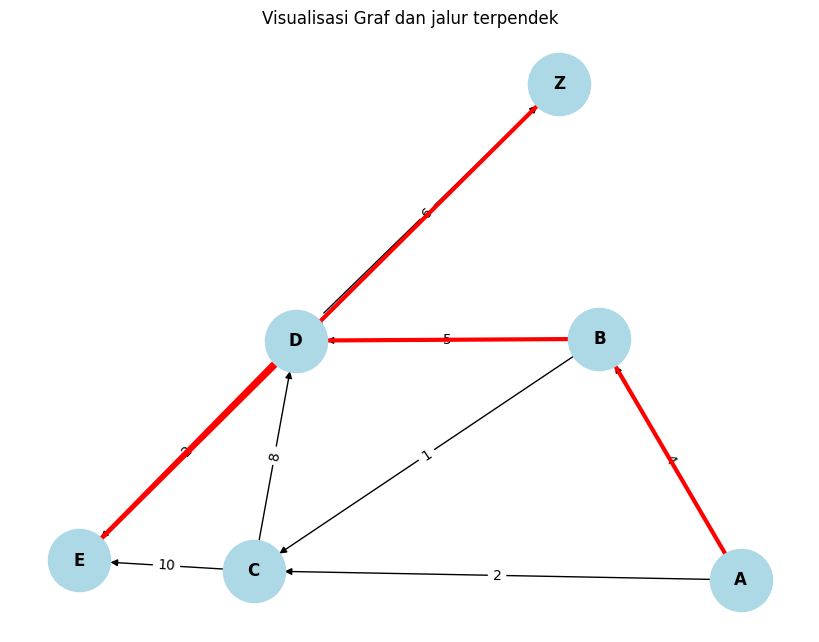

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous


def get_path(previous, target):
    path = []
    while target is not None :
        path.insert(0, target)
        target = previous[target]
    return path
def visualize_graph(graph, path=None):
    G = nx.DiGraph()

    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)
    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels = True, node_color='lightblue', node_size=2000, font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)

    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width= 3)

    plt.title("Visualisasi Graf dan jalur terpendek")
    plt.axis('off')
    plt.show()

graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D' : 8, 'E': 10},
    'D': {'E' :2, 'Z': 6},
    'E': {'Z' : 3},
    'Z': {}
}

start_node = 'A'
end_node = 'Z'
distances, previous = dijkstra_with_paths(graph, start_node)

shortest_path = get_path(previous, end_node)
print(f"Jarak dari {start_node} ke {end_node} : {distances[end_node]}")
print(f"Jalur: {'->'.join(shortest_path)}")

visualize_graph(graph, path=shortest_path)